# 58 Creating hexagonal grid in GemGIS

This notebook illustrates how to create a hexagonal grid using GemGIS. This will be demonstrated for the boundaries of the city of Aachen provided as Shapely Polygon. A radius for the hexagons can be defined to adjust the number of total hexagons. This radius equals the distance from the center point to each vertex and is by definition the length of each side of the hexagon. 

<center><img src="../images/hexagon.png" width=300></center>


<img src="../images/tutorial58_cover.png">

## Set File Paths and download Tutorial Data

If you downloaded the latest `GemGIS` version from the Github repository, append the path so that the package can be imported successfully. Otherwise, it is recommended to install `GemGIS` via `pip install gemgis` and import `GemGIS` using `import gemgis as gg`. In addition, the file path to the folder where the data is being stored is set. The tutorial data is downloaded using Pooch (https://www.fatiando.org/pooch/latest/index.html) and stored in the specified folder. Use `pip install pooch` if Pooch is not installed on your system yet.

In [1]:
import warnings
warnings.filterwarnings("ignore")

import geopandas as gpd
import pandas as pd
import gemgis as gg
import numpy as np
import matplotlib.pyplot as plt
from shapely.geometry import Point, Polygon

In [2]:
file_path ='data/58_creating_hexagonal_grid/'
gg.download_gemgis_data.download_tutorial_data(filename="58_creating_hexagonal_grid.zip", dirpath=file_path)

## Loading Outline of Aachen from Shapefile

The outline of the city of Aachen is loaded as GeoDataFrame and displayed as Shapely polyon.

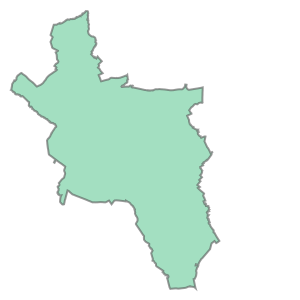

In [3]:
outline = gpd.read_file(file_path + 'outline.shp')
outline.loc[0].geometry

## Creating a single hexagon

A single hexagon can be created by providing the coordinates of the center point and the radius of hexagon using the GemGIS method `gg.vector.create_hexagon(...)`. The radius is equal to the radius of the inner circle within a hexagon.

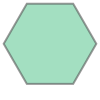

In [4]:
gg.vector.create_hexagon(center=Point(0,0), 
               radius=1)

## Obtaining the total bounds polygon for the calculation of hexagons

Based on the input shape, a total bounds polygon is calculated to create the hexagon grid. 

In [5]:
outline.total_bounds

array([3726110.8907332 , 2663054.98848197, 3742096.48479688,
       2684380.29935271])

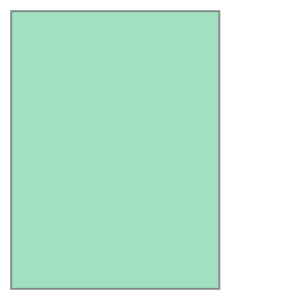

In [6]:
outline_total_bounds_polygon = Polygon([(outline.total_bounds[0],
                                         outline.total_bounds[1]), 
                                        (outline.total_bounds[0],
                                         outline.total_bounds[3]), 
                                        (outline.total_bounds[2],
                                         outline.total_bounds[3]),
                                        (outline.total_bounds[2],
                                         outline.total_bounds[1])])

outline_total_bounds_polygon

In [7]:
polygon_gdf = gpd.GeoDataFrame(geometry=[outline_total_bounds_polygon], 
                               crs=outline.crs)
polygon_gdf

,geometry
0,"POLYGON ((3726110.891 2663054.988, 3726110.891..."


## Plotting the outline and the total bounds polygon

<Axes: >

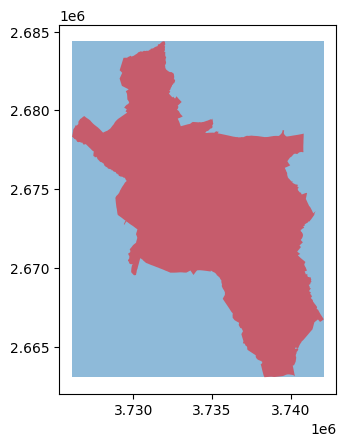

In [8]:
fix, ax = plt.subplots(1)

polygon_gdf.plot(ax=ax, alpha=0.5)
outline.plot(color='red', ax=ax, alpha=0.5)


## Creating hexagon grid

The function `gg.vector.create_hexagon_grid(...)` creates a hexagon grid based on the total bounds of the provided outline. Setting `crop_gdf` to `False` will return the entire GeoDataFrame with the hexagon grid. 

In [9]:
hex_gdf = gg.vector.create_hexagon_grid(gdf=outline,
                                        radius=500, 
                                        crop_gdf=False)
hex_gdf.head()

,geometry
0,"POLYGON ((3726360.891 2684813.312, 3725860.891..."
1,"POLYGON ((3726360.891 2683947.287, 3725860.891..."
2,"POLYGON ((3726360.891 2683081.261, 3725860.891..."
3,"POLYGON ((3726360.891 2682215.236, 3725860.891..."
4,"POLYGON ((3726360.891 2681349.210, 3725860.891..."


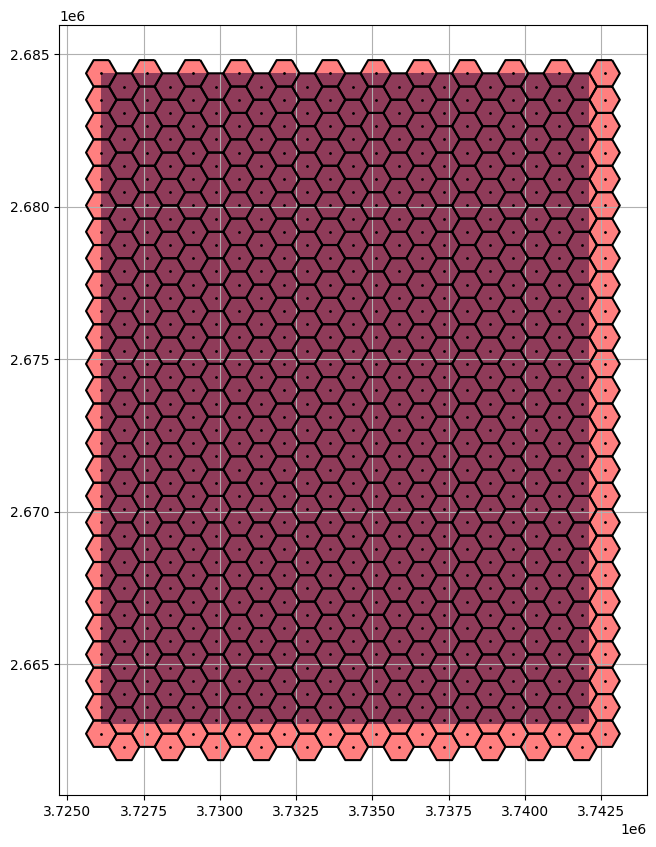

In [10]:
fig, ax = plt.subplots(1, figsize=(10,10))

polygon_gdf.plot(ax=ax)

hex_gdf.plot(ax=ax, 
             color='red', 
             alpha=0.5)

hex_gdf.exterior.plot(ax=ax, 
                      color='black')

hex_gdf.centroid.plot(ax=ax, 
                      color='black', 
                      markersize=1)
plt.grid()

Using a smaller radius will lead to a finer grid with a higher number of hexagons. 

In [11]:
hex_gdf250 = gg.vector.create_hexagon_grid(gdf=outline,
                                           radius=250, 
                                           crop_gdf=False)
hex_gdf250.head()

,geometry
0,"POLYGON ((3726235.891 2684596.806, 3725985.891..."
1,"POLYGON ((3726235.891 2684163.793, 3725985.891..."
2,"POLYGON ((3726235.891 2683730.780, 3725985.891..."
3,"POLYGON ((3726235.891 2683297.768, 3725985.891..."
4,"POLYGON ((3726235.891 2682864.755, 3725985.891..."


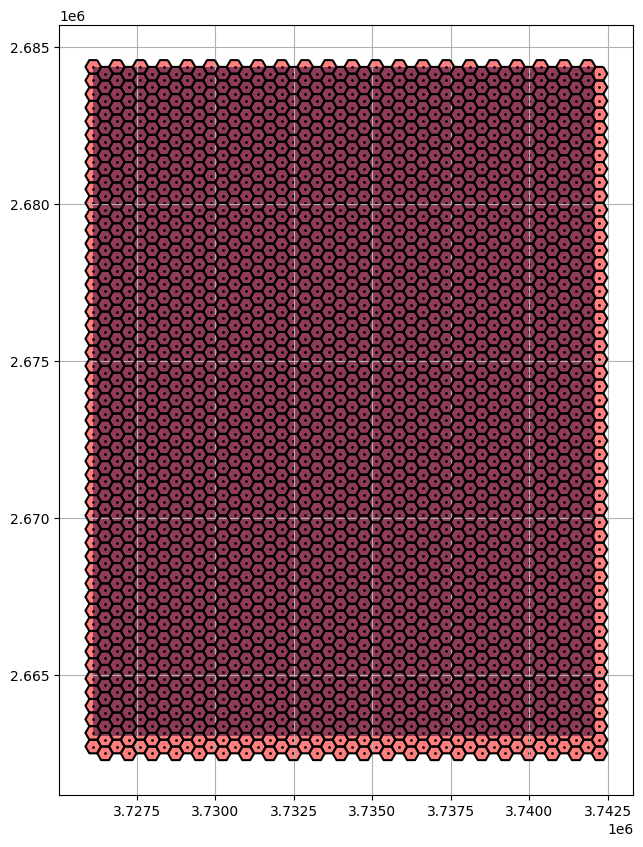

In [12]:
fig, ax = plt.subplots(1, figsize=(10,10))

polygon_gdf.plot(ax=ax)

hex_gdf250.plot(ax=ax, 
                color='red', 
                alpha=0.5)

hex_gdf250.exterior.plot(ax=ax, 
                         color='black')

hex_gdf250.centroid.plot(ax=ax, 
                         color='black', 
                         markersize=1)
plt.grid()

## Creating cropped hexagon grid

Setting `crop_gdf` to `True` will automatically crop the resulting GeoDataFrame to the outline of the provided GeoDataFrame.

In [13]:
hex_gdf = gg.vector.create_hexagon_grid(gdf=outline,
                                        radius=500, 
                                        crop_gdf=True)
hex_gdf.head()

,geometry
0,"POLYGON ((3726360.891 2679617.160, 3725860.891..."
1,"POLYGON ((3726360.891 2678751.134, 3725860.891..."
2,"POLYGON ((3727110.891 2680050.172, 3726610.891..."
3,"POLYGON ((3727110.891 2679184.147, 3726610.891..."
4,"POLYGON ((3727110.891 2678318.122, 3726610.891..."


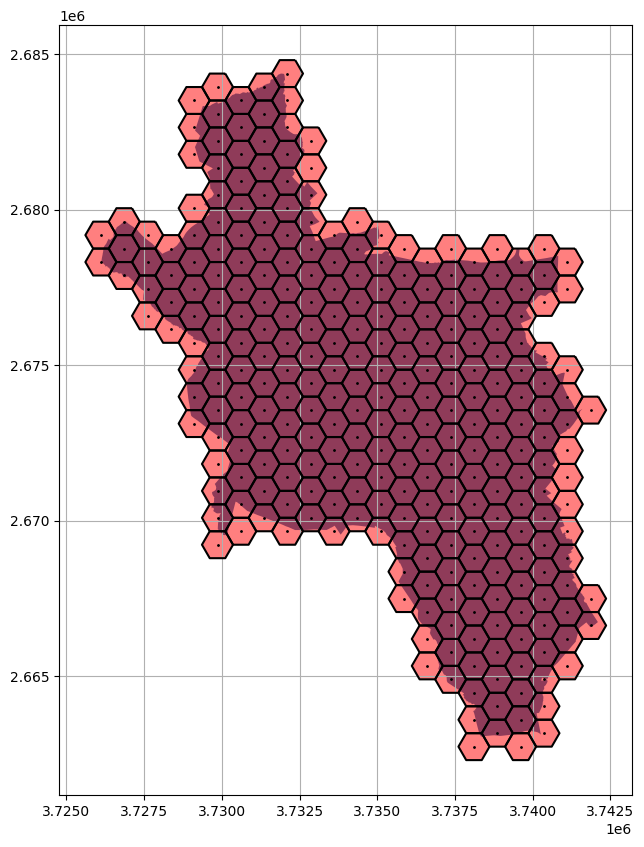

In [14]:
fig, ax = plt.subplots(1, figsize=(10,10))

outline.plot(ax=ax)

hex_gdf.plot(ax=ax, 
             color='red', 
             alpha=0.5)

hex_gdf.exterior.plot(ax=ax, 
                      color='black')

hex_gdf.centroid.plot(ax=ax, 
                      color='black', 
                      markersize=1)

plt.grid()

## Displaying random values in hexagon

The main purpose of creating the hexagon grid is to display certain values of the underlying map (e.g. population density, heat demand, etc.). The following simply illustrates how to assign random values to the hexagons and how to plot them. 

In [15]:
values = np.random.randint(0, 
                           200, 
                           len(hex_gdf))

hex_gdf['values'] = values

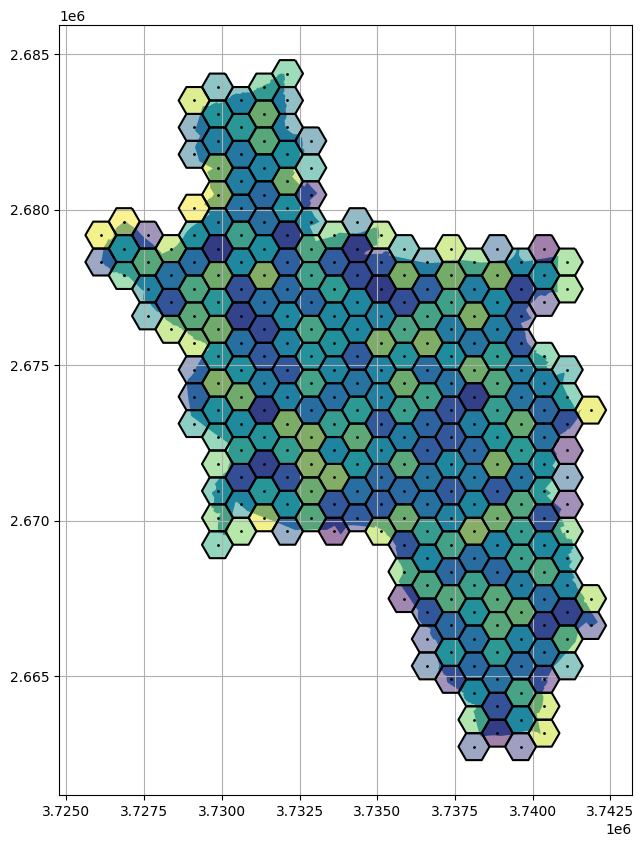

In [16]:
fig, ax = plt.subplots(1, figsize=(10,10))

outline.plot(ax=ax)

hex_gdf.plot(ax=ax, 
             column='values', 
             alpha=0.5)

hex_gdf.exterior.plot(ax=ax, 
                      color='black')

hex_gdf.centroid.plot(ax=ax, 
                      color='black', 
                      markersize=1)

plt.grid()